In [1]:
using QuantumCollocation
using NamedTrajectories
using TrajectoryIndexingUtils
using Flux
using ReinforcementLearning
using IntervalSets
using LinearAlgebra
using Base
using Distributions
using Statistics
using Printf
using Reexport
using Revise
using DomainSets
using CairoMakie

includet("PPO.jl")
includet("AIRL.jl")

In [2]:
function RLBase.act!(env::CartPoleEnv, a::Vector{Float32})
    RLBase.act!(env,a[1])
end

RLBase.action_space(env::CartPoleEnv) = (-Inf..Inf)


function RLBase.reward(env::CartPoleEnv,action::Union{Vector{Float32},Nothing};kwargs...)
    return Float32(RLBase.reward(env))
end

In [3]:
env = CartPoleEnv(;T=Float64,continuous=true)
history_list = []
expert_𝒫,score_history = PPO(env;η=3f-4,iterations=50,vf_ratio=5f-1,norm_adv = true,ϵ= 2f-1,ent_ratio=1f-3,KL_targ=5f-2,l=[64,64],stop_score=2.01f2)

Iterations 1 Complete
Updates 320
Avg Score: 14.67143
Total Steps: 2054
Total Trajectories: 140
Final KL: 0.01236
Mean Policy Loss: 0.01330
Mean Value Loss: 53.15068
Mean Entropy: 1.36205
Mean ADV: 6.93664
Mean Clip Ratio: 0.07490
-------------------------
Iterations 2 Complete
Updates 320
Avg Score: 17.10744
Total Steps: 2070
Total Trajectories: 121
Final KL: 0.01018
Mean Policy Loss: 0.01637
Mean Value Loss: 23.83010
Mean Entropy: 1.41406
Mean ADV: 5.56952
Mean Clip Ratio: 0.09336
-------------------------
Iterations 3 Complete
Updates 29
Avg Score: 20.10680
Total Steps: 2071
Total Trajectories: 103
Final KL: 0.07536
Mean Policy Loss: 0.02664
Mean Value Loss: 59.44604
Mean Entropy: 1.42028
Mean ADV: 3.91463
Mean Clip Ratio: 0.18481
-------------------------
Iterations 4 Complete
Updates 330
Avg Score: 30.78261
Total Steps: 2124
Total Trajectories: 69
Final KL: 0.01957
Mean Policy Loss: 0.02521
Mean Value Loss: 229.41252
Mean Entropy: 1.36898
Mean ADV: 8.28986
Mean Clip Ratio: 0.14223

(ActorCriticPolicy(Chain(Dense(4 => 64, tanh), Dense(64 => 64, tanh)), Dense(64 => 1, tanh), Dense(64 => 1, log_std_clip), Chain(Dense(4 => 64, tanh), Dense(64 => 64, tanh), Dense(64 => 1))), Float32[14.671429, 17.107437, 20.106796, 30.782608, 56.37838, 104.55, 137.8, 154.9, 170.35, 182.0, 148.85, 173.45, 195.6, 201.0])

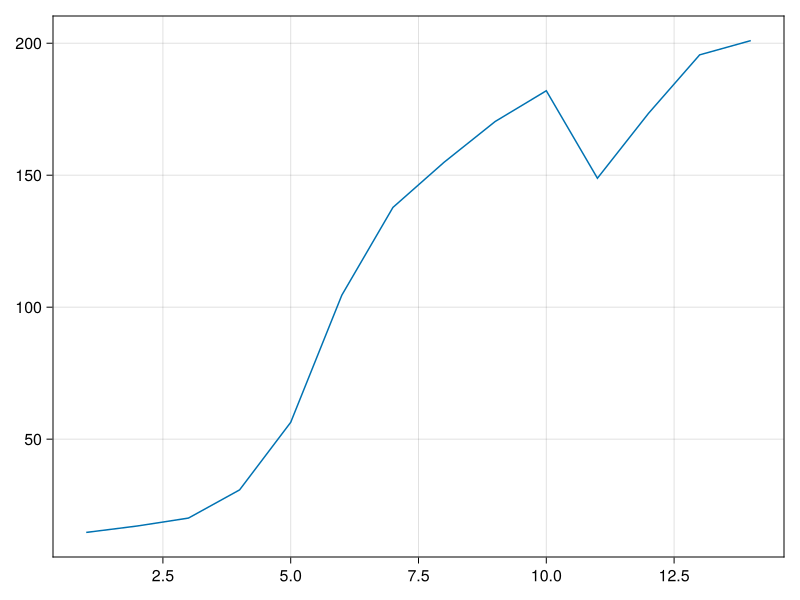

In [4]:
##### using CairoMakie
fig = Figure()
ax = Axis(fig[1, 1])
lines!(ax,1:length(score_history),score_history)
fig


In [5]:
expert_states = Vector{Vector{Float32}}()
expert_acts = Vector{Vector{Float32}}()
expert_new_states= Vector{Vector{Float32}}()
scores = Vector{Float32}()
for i in 1:11
    r,a,s,ns = sas_sample(expert_𝒫,env;deterministic=true)
    expert_states = vcat(expert_states,s)
    expert_acts = vcat(expert_acts,a)
    expert_new_states = vcat(expert_new_states,ns)
    push!(scores,sum(r))
end
mean(scores)

201.0f0

In [6]:
#𝒫 = ActorCriticPolicy(env;)
#behavior_clone_𝒫 = behavior_clone(𝒫,expert_states,expert_acts;epochs=5000,η=5f-5) 

In [7]:
includet("AIRL.jl")
AIRL_𝒫,score_history,e_losses,s_losses,total_d_losses = AIRL(env,expert_states,expert_acts,expert_new_states;n_steps=size(expert_states)[end],η=3f-4,iterations=1,vf_ratio=5f-1,norm_adv = true,ϵ= 2f-1,ent_ratio=1f-3,KL_targ=5f-2,l=[64,64],stop_score=2.01f2)

0
52
79
96
112
127
156
176
192
202
214
242
259
278
298
328
352
388
404
413
459
473
484
540
555
592
619
645
658
700
719
730
759
795
827
838
863
935
949
973
984
1004
1042
1069
1082
1103
1116
1165
1189
1205
1230
1259
1279
1293
1316
1330
1350
1381
1389
1418
1436
1445
1460
1476
1495
1509
1520
1542
1622
1638
1657
1678
1693
1713
1764
1819
1853
1870
1889
1905
1917
1959
1987
1998
2013
2066
2083
2119
2144
2164
2188
2208
2236
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108


LoadError: InterruptException:

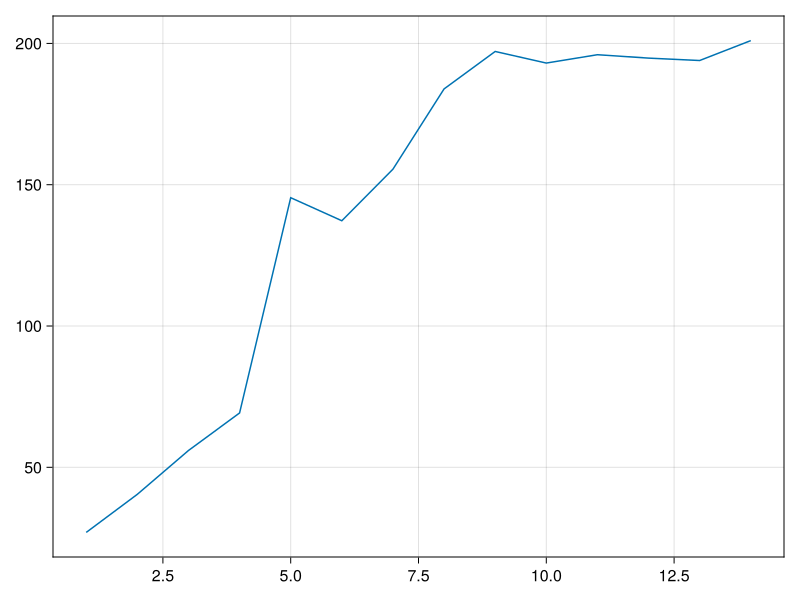

In [8]:
##### using CairoMakie
fig = Figure()
ax = Axis(fig[1, 1])
lines!(ax,1:length(score_history),score_history)
fig


In [9]:
#AIRL_behavior_clone_𝒫,score_history = AIRL(env,expert_states,expert_acts,expert_new_states;n_steps=size(expert_states)[end],η=3f-4,iterations=250,vf_ratio=5f-1,norm_adv = true,ϵ= 2f-1,ent_ratio=1f-3,KL_targ=5f-2,l=[64,64],stop_score=2.01f2,initial_policy=behavior_clone_𝒫)

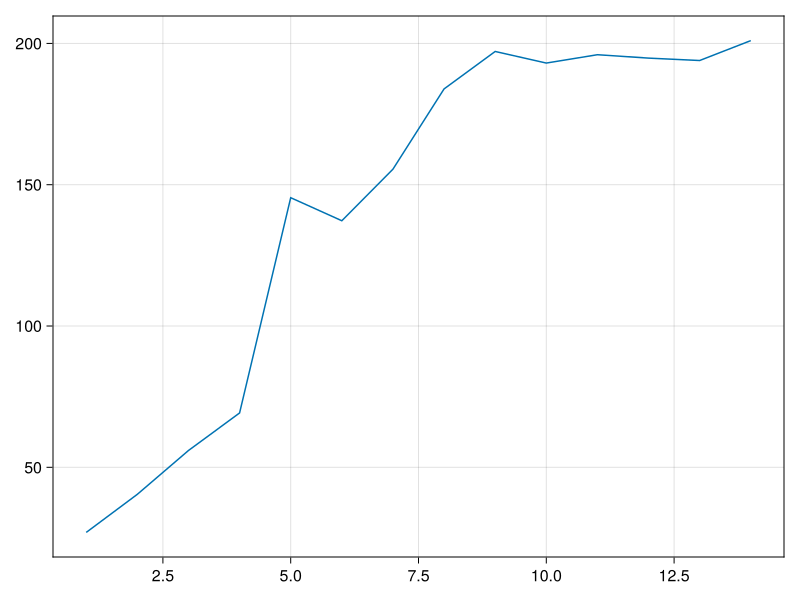

In [10]:
##### using CairoMakie
fig = Figure()
ax = Axis(fig[1, 1])
lines!(ax,1:length(score_history),score_history)
fig